In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from tools import compute_PCA, compute_TSNE, load_data

**Multiclass classification**

In [2]:
X, y, p = load_data([ps for ps in range(1, 16)], z_score_norm="participant_meanfree")
X = X.reshape(X.shape[0], X.shape[1] * X.shape[1])

load: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15']
before: 0.010833320819703356 0.0138765904356241
after global: 3.3453047822980234e-16 1.0
before: 0.014157458413294332 0.019697427174936128
after global: 5.144634718234897e-16 0.9999999999999999
before: 0.009671310470783361 0.01382165546457677
after global: 5.894732537024589e-17 0.9999999999999996
before: 0.014321327169414132 0.02092426207628347
after global: -8.412627794765627e-17 0.9999999999999994
before: 0.008012871473850146 0.008465251726686069
after global: -2.9350674187145196e-16 0.9999999999999999
before: 0.015501076883670332 0.020161922062374903
after global: -2.3778118615833976e-16 0.9999999999999998
before: 0.005785778427333883 0.008299444524589267
after global: -9.745232778682356e-18 1.0
before: 0.01421073297731075 0.016707890764832815
after global: -1.4497636640483996e-16 0.9999999999999998
before: 0.0105969642036091 0.012696071282817526
after global: 2.4956514487

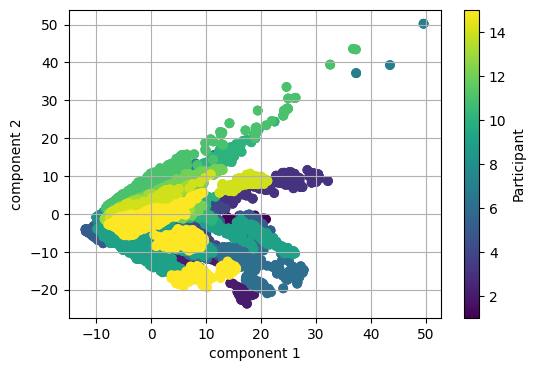

In [3]:
compute_PCA(
    X,
    feature=p,
    feature_label="Participant",
)

In [4]:
X_mc = list()
Y_mc = list()
for xs, ys in zip(X, y):
    yr = np.round(ys, -1)
    if yr >= 20 and yr <= 80:
        X_mc.append(xs)
        Y_mc.append(yr)
X_mc = np.array(X_mc)
Y_mc = np.array(Y_mc, dtype=int)

X_train, X_test, y_train, y_test = train_test_split(
    X_mc, Y_mc, test_size=0.2, random_state=42
)

**SVM**

**Random Forest**

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.95


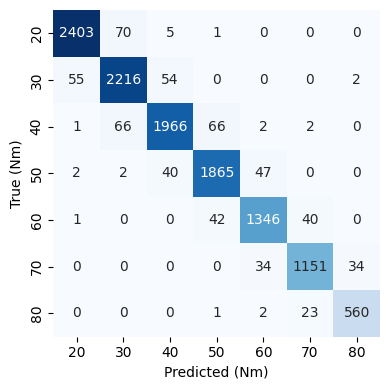

              precision    recall  f1-score   support

          20       0.98      0.97      0.97      2479
          30       0.94      0.95      0.95      2327
          40       0.95      0.93      0.94      2103
          50       0.94      0.95      0.95      1956
          60       0.94      0.94      0.94      1429
          70       0.95      0.94      0.95      1219
          80       0.94      0.96      0.95       586

    accuracy                           0.95     12099
   macro avg       0.95      0.95      0.95     12099
weighted avg       0.95      0.95      0.95     12099



In [6]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cbar=False,
    cmap="Blues",
    xticklabels=np.unique(Y_mc),
    yticklabels=np.unique(Y_mc),
)
plt.xlabel("Predicted (Nm)")
plt.ylabel("True (Nm)")
# plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.savefig("imgs/CM_7RF_good_blue.pdf")
plt.show()

print(classification_report(y_test, y_pred_rf))

**Random Forest - train test split**

In [13]:
X, y, p = load_data([ps for ps in range(1, 15)], z_score_norm="participant_meanfree")
X = X.reshape(X.shape[0], X.shape[1] * X.shape[1])

X_test, y_test, p = load_data([ps for ps in [15]], z_score_norm="participant_meanfree")
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[1])

X_mc = list()
Y_mc = list()
for xs, ys in zip(X, y):
    yr = np.round(ys, -1)
    if yr >= 20 and yr <= 80:
        X_mc.append(xs)
        Y_mc.append(yr)
X_train = np.array(X_mc)
y_train = np.array(Y_mc, dtype=int)

X_mc_test = list()
Y_mc_test = list()
for xs, ys in zip(X_test, y_test):
    yr = np.round(ys, -1)
    if yr >= 20 and yr <= 80:
        X_mc_test.append(xs)
        Y_mc_test.append(yr)

X_test = np.array(X_mc_test)
y_test = np.array(Y_mc_test, dtype=int)

load: ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', 'P12', 'P13', 'P14']
before: 0.010833320819703356 0.0138765904356241
after global: 3.3453047822980234e-16 1.0
before: 0.014157458413294332 0.019697427174936128
after global: 5.144634718234897e-16 0.9999999999999999
before: 0.009671310470783361 0.01382165546457677
after global: 5.894732537024589e-17 0.9999999999999996
before: 0.014321327169414132 0.02092426207628347
after global: -8.412627794765627e-17 0.9999999999999994
before: 0.008012871473850146 0.008465251726686069
after global: -2.9350674187145196e-16 0.9999999999999999
before: 0.015501076883670332 0.020161922062374903
after global: -2.3778118615833976e-16 0.9999999999999998
before: 0.005785778427333883 0.008299444524589267
after global: -9.745232778682356e-18 1.0
before: 0.01421073297731075 0.016707890764832815
after global: -1.4497636640483996e-16 0.9999999999999998
before: 0.0105969642036091 0.012696071282817526
after global: 2.4956514487339933e

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.26


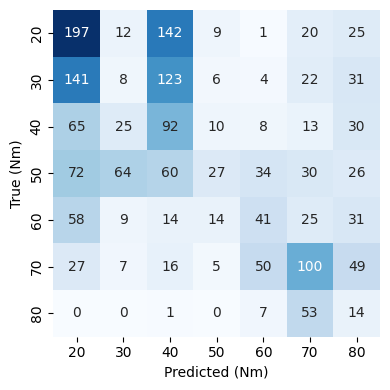

              precision    recall  f1-score   support

          20       0.35      0.49      0.41       406
          30       0.06      0.02      0.03       335
          40       0.21      0.38      0.27       243
          50       0.38      0.09      0.14       313
          60       0.28      0.21      0.24       192
          70       0.38      0.39      0.39       254
          80       0.07      0.19      0.10        75

    accuracy                           0.26      1818
   macro avg       0.25      0.25      0.23      1818
weighted avg       0.27      0.26      0.24      1818



In [15]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cbar=False,
    cmap="Blues",
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test),
)
plt.xlabel("Predicted (Nm)")
plt.ylabel("True (Nm)")
# plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.savefig("imgs/CM_7RF_test_blue.pdf")
plt.show()

print(classification_report(y_test, y_pred_rf))

___